In [1]:
conda update --all

Solving environment: - 
  - defaults/noarch::sphinx-3.2.1-py_0, defaults/osx-64::docutils-0.17-py38hecd8cb5_1
  - defaults/noarch::sphinx-3.5.4-pyhd3eb1b0_0, defaults/osx-64::docutils-0.16-py38done

## Package Plan ##

  environment location: /opt/anaconda3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    nbclient-0.5.3             |     pyhd3eb1b0_0          62 KB
    ------------------------------------------------------------
                                           Total:          62 KB

The following packages will be UPDATED:

  nbclient                                       0.5.1-py_0 --> 0.5.3-pyhd3eb1b0_0
  nest-asyncio                           1.4.2-pyhd3eb1b0_0 --> 1.5.1-pyhd3eb1b0_0



nbclient-0.5.3       | 62 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to re

In [1]:
conda install -c conda-forge dowhy

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - dowhy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       h033912b_0         138 KB  conda-forge
    certifi-2020.12.5          |   py38h50d1736_1         143 KB  conda-forge
    conda-4.10.1               |   py38h50d1736_0         3.1 MB  conda-forge
    dowhy-0.5.1                |     pyhd8ed1ab_0          79 KB  conda-forge
    graphviz-2.42.3            |       h98dfb87_0         7.1 MB  conda-forge
    jpeg-9d                    |       hbcb3906_0         250 KB  conda-forge
    openssl-1.1.1k             |       h0d85af4_0         1.9 MB  con

In [53]:
#https://github.com/microsoft/dowhy/blob/master/docs/source/example_notebooks/dowhy_simple_example.ipynb

#0  load all required packages

import numpy as np
import pandas as pd

import dowhy
from dowhy import CausalModel
import dowhy.datasets 

# Avoid printing dataconversion warnings from sklearn
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Config dict to set the logging level
import logging.config
DEFAULT_LOGGING = {
    'version': 1,
    'disable_existing_loggers': False,
    'loggers': {
        '': {
            'level': 'WARN',
        },
    }
}

logging.config.dictConfig(DEFAULT_LOGGING)

## 0  load a data set

In [56]:
#https://microsoft.github.io/dowhy/_modules/dowhy/datasets.html
#module dataset (a dataset with linear relationships between common causes and treatment, and common causes and outcome)
#モデルのグラフも作られている

data = dowhy.datasets.linear_dataset(beta=10, #因果効果の真値
        num_common_causes=5, #共通する原因の数("W*")
        num_instruments = 2, #操作変数の数("Z*")
        num_effect_modifiers=1, #交互作用要因の数("X0")
        num_samples=20000, 
        treatment_is_binary=True, #処置は２値であるか("v0")
        num_discrete_common_causes=1) 
df = data["df"]
print(df.head())
print(data["dot_graph"])
print("\n")
print(data["gml_graph"])

         X0   Z0        Z1        W0        W1        W2        W3 W4    v0  \
0 -0.876325  1.0  0.550243  1.534643 -1.055279 -0.533692  0.731543  1  True   
1 -2.328598  1.0  0.751548  1.201598  0.350914  1.429082 -0.576668  2  True   
2 -2.197907  1.0  0.585962 -0.156289 -1.529564  0.305357  0.773590  0  True   
3 -1.071653  1.0  0.763187  0.170211 -2.323526  0.581528 -1.425969  3  True   
4  1.149913  1.0  0.741334 -0.084282  1.244177  2.101137  3.131470  0  True   

           y  
0  14.312808  
1  16.631042  
2   1.996826  
3  12.992442  
4  26.328806  
digraph { U[label="Unobserved Confounders"]; U->y;v0->y;U->v0;W0-> v0; W1-> v0; W2-> v0; W3-> v0; W4-> v0;Z0-> v0; Z1-> v0;W0-> y; W1-> y; W2-> y; W3-> y; W4-> y;X0-> y;}


graph[directed 1node[ id "y" label "y"]node[ id "Unobserved Confounders" label "Unobserved Confounders"]edge[source "Unobserved Confounders" target "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[ 

In [28]:
print(data["gml_graph"])

graph[directed 1node[ id "y" label "y"]node[ id "Unobserved Confounders" label "Unobserved Confounders"]edge[source "Unobserved Confounders" target "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[ id "W4" label "W4"]node[ id "Z0" label "Z0"] node[ id "Z1" label "Z1"]node[ id "v0" label "v0"]edge[source "Unobserved Confounders" target "v0"]edge[source "v0" target "y"]edge[ source "W0" target "v0"] edge[ source "W1" target "v0"] edge[ source "W2" target "v0"] edge[ source "W3" target "v0"] edge[ source "W4" target "v0"]edge[ source "Z0" target "v0"] edge[ source "Z1" target "v0"]edge[ source "W0" target "y"] edge[ source "W1" target "y"] edge[ source "W2" target "y"] edge[ source "W3" target "y"] edge[ source "W4" target "y"]node[ id "X0" label "X0"] edge[ source "X0" target "y"]]


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


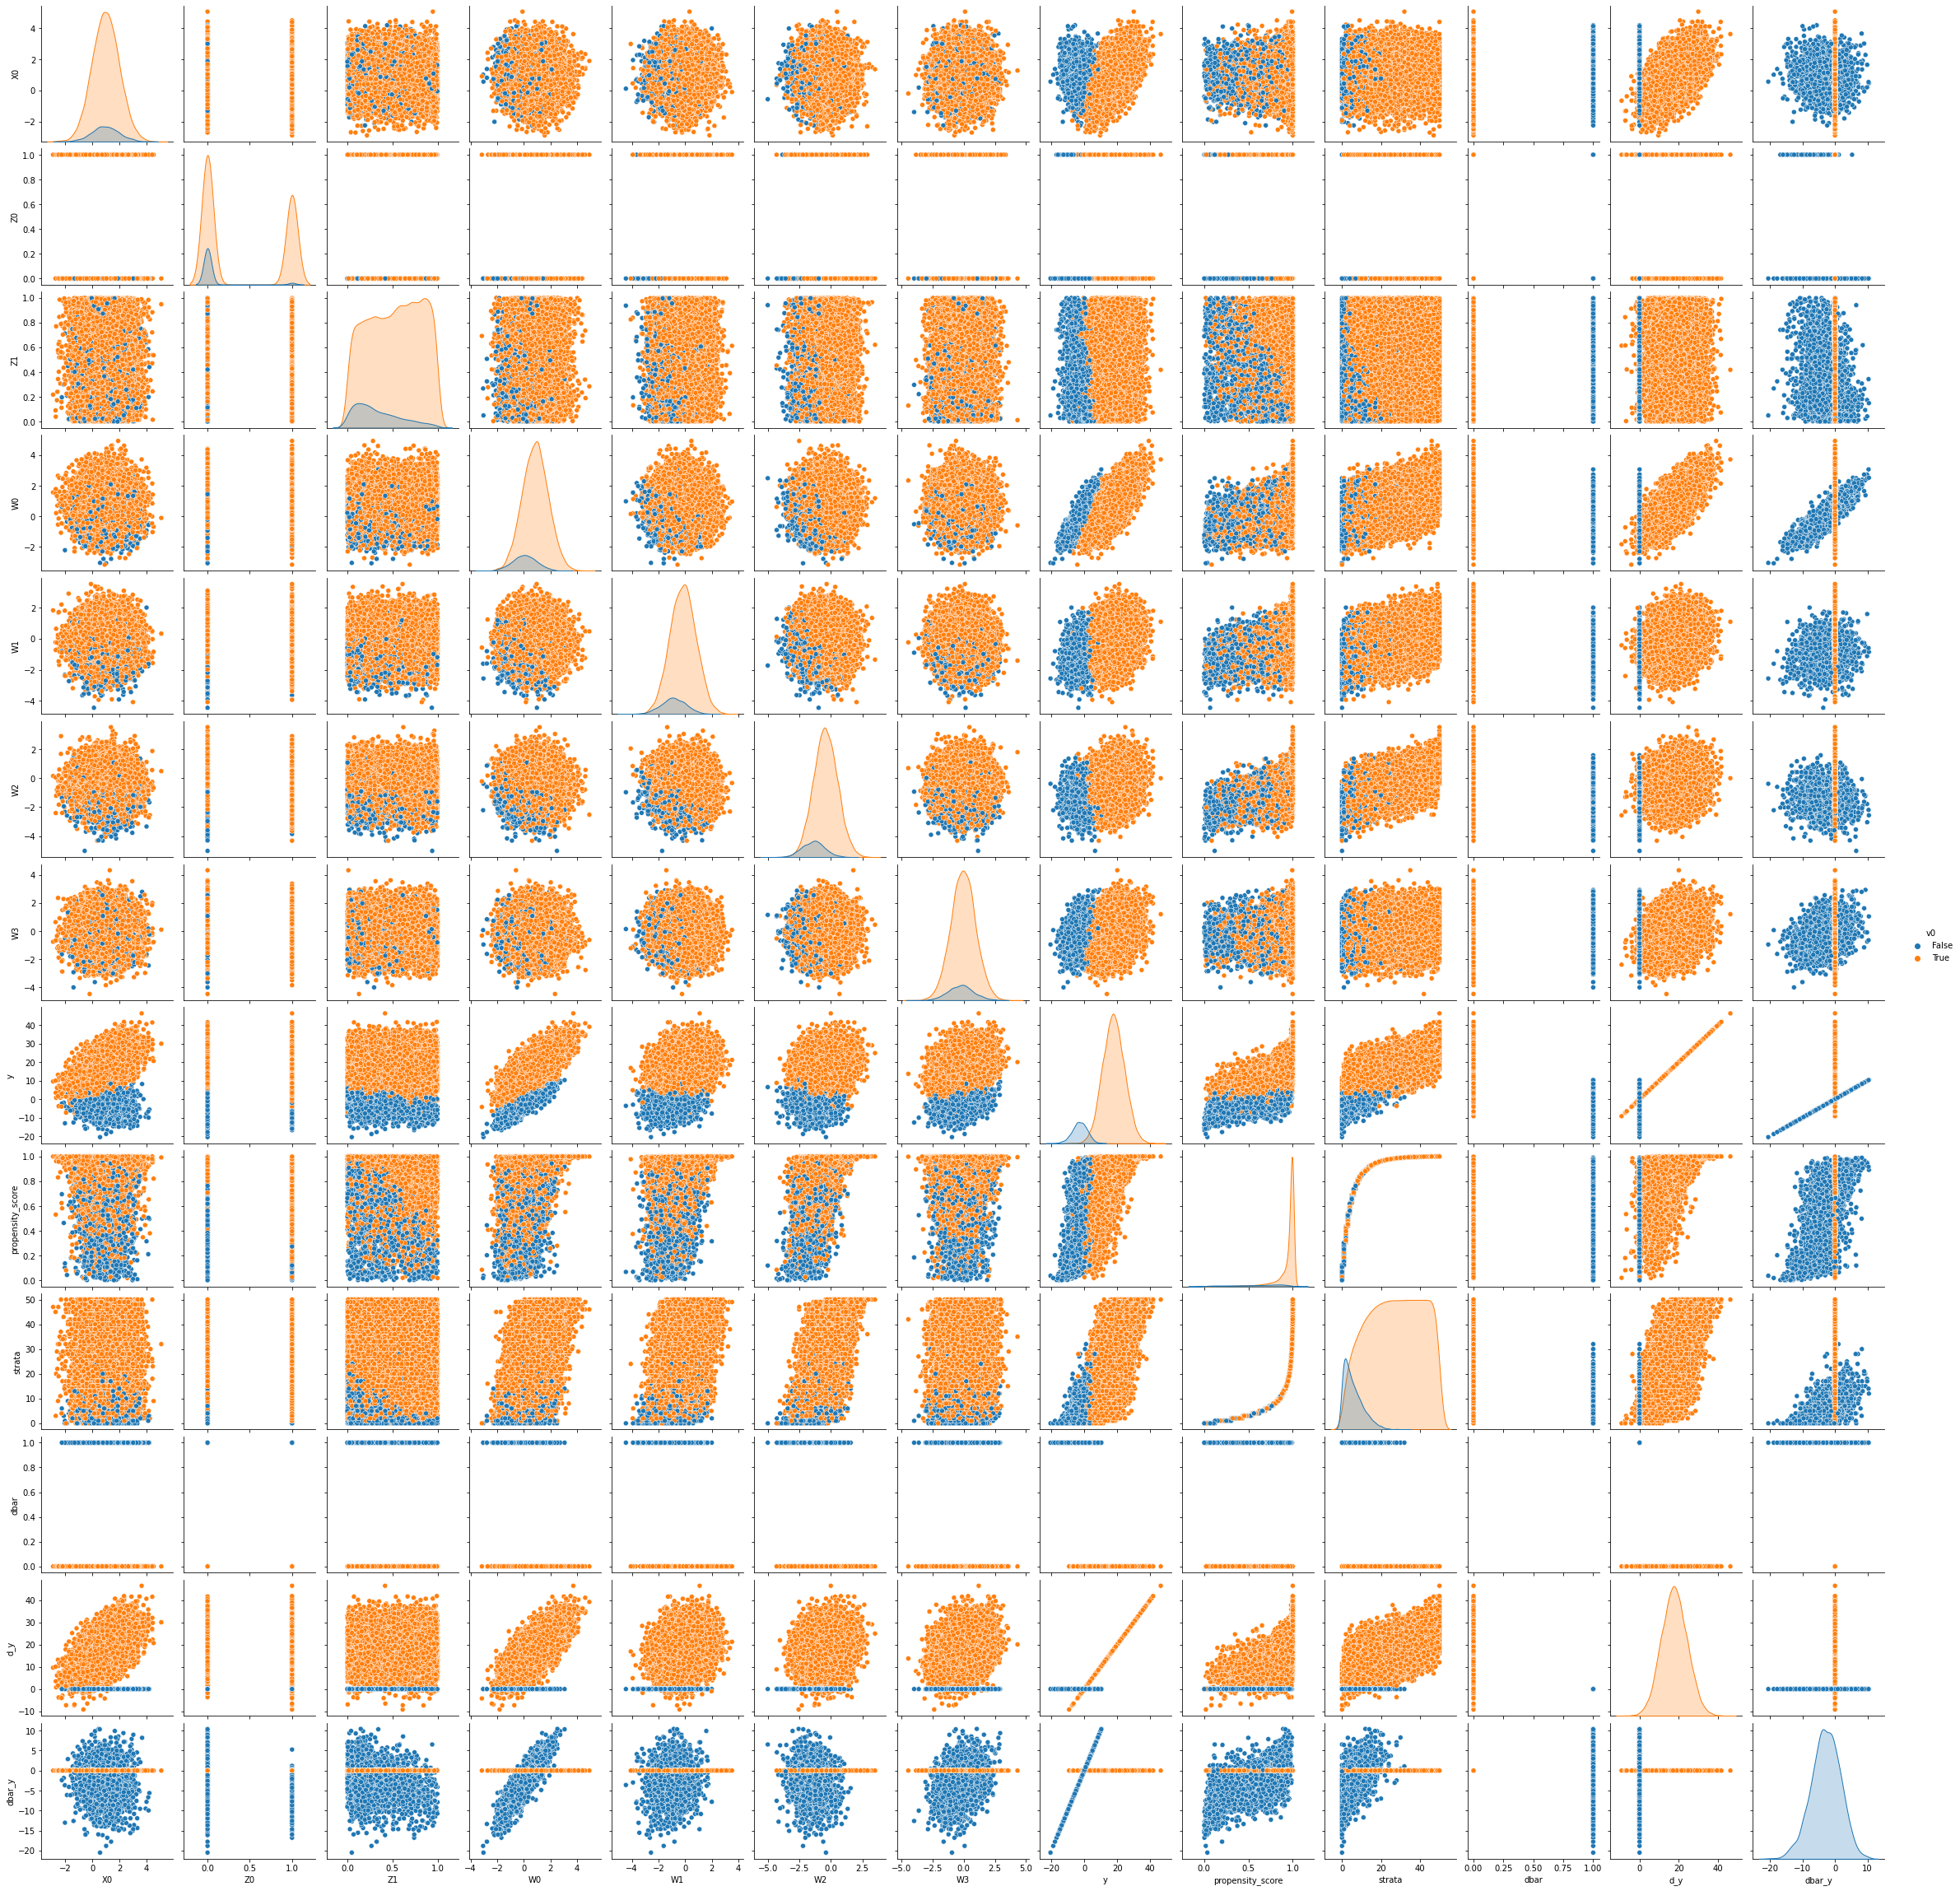

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#sns.pairplot(df, hue="v0", height=2.5)  #変数"v0"を軸に分布確認、重い

## 1 Input causal graph

In [5]:
# モデルはどうやって作成するのか？
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']


In [9]:
conda install -c conda-forge pygraphviz

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pygraphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pygraphviz-1.7             |   py38hc279c98_0         121 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         121 KB

The following NEW packages will be INSTALLED:

  pygraphviz         conda-forge/osx-64::pygraphviz-1.7-py38hc279c98_0



pygraphviz-1.7       | 121 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [6]:
model.view_model()

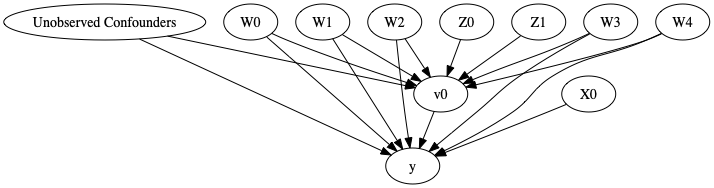

In [7]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

## 2 Identification

In [8]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['Z1', 'Z0']
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor1 (Default)
Estimand expression:
  d                                    
─────(Expectation(y|W3,W4,W2,X0,W0,W1))
d[v₀]                                  
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W4,W2,X0,W0,W1,U) = P(y|v0,W3,W4,W2,X0,W0,W1)

### Estimand : 2
Estimand name: backdoor2
Estimand expression:
  d                                 
─────(Expectation(y|W3,W4,W2,W0,W1))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W4,W2,W0,W1,U) = P(y|v0,W3,W4,W2,W0,W1)

### Estimand : 3
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z1, Z0])*Derivative([v0], [Z1, Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

### Estimand : 4
Estimand name: frontdoor
No such variable found!



## 3 Estimation

In [9]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

#index.ravelがndarray(numpyのN次元配列構造)を返すのは非推奨？

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W3+W4+W2+X0+W0+W1
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

## Realized estimand
b: y~v0+W3+W4+W2+X0+W0+W1
Target units: ate

## Estimate
Mean value: 13.558838093436751

Causal Estimate is 13.558838093436751


/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]


In [14]:
# Causal effect on the control group (ATC)
causal_estimate_att = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification",
        target_units = "atc")
print(causal_estimate_att)
print("Causal Estimate is " + str(causal_estimate_att.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W3+W4+W2+X0+W0+W1


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

## Realized estimand
b: y~v0+W3+W4+W2+X0+W0+W1
Target units: atc

## Estimate
Mean value: 13.423725827641539

Causal Estimate is 13.423725827641539


/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]


In [15]:
# Without graph（分析者がグラフなしにモデルを入れた場合）                                       
model= CausalModel(                             
        data=df,                                      
        treatment=data["treatment_name"],             
        outcome=data["outcome_name"],                 
        common_causes=data["common_causes_names"],
        effect_modifiers=data["effect_modifier_names"])

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']


In [16]:
model.view_model()

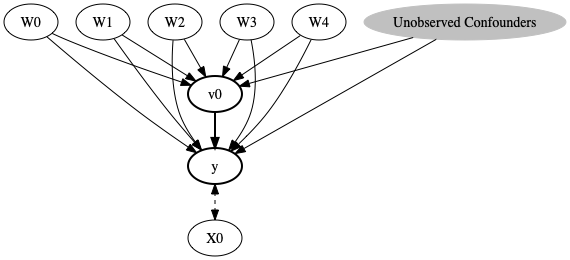

In [17]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [18]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]


In [19]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_stratification")         
print(estimate)
print("Causal Estimate is " + str(estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

## Realized estimand
b: y~v0+W4+W3+W2+W0+W1
Target units: ate

## Estimate
Mean value: 13.707295193759862

Causal Estimate is 13.707295193759862


/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]


## 4 Refuting the estimate

In [20]:
#Adding a random common cause variable
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1+w_random


Refute: Add a Random Common Cause
Estimated effect:13.707295193759862
New effect:13.682146499002823



/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]


In [22]:
#Adding an unobserved common cause variable
res_unobserved=model.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02)
print(res_unobserved)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1


Refute: Add an Unobserved Common Cause
Estimated effect:13.707295193759862
New effect:12.403657505995339



/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]


In [23]:
#Replacing treatment with a random (placebo) variable
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

INFO:dowhy.causal_refuters.placebo_treatment_refuter:Refutation over 100 simulated datasets of permute treatment
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outco

INFO:dowhy.causal_estimator:b: y~placebo+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-pa

/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratifi

INFO:dowhy.causal_estimator:b: y~placebo+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-pa

/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratifi

INFO:dowhy.causal_estimator:b: y~placebo+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~placebo+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-pa

Refute: Use a Placebo Treatment
Estimated effect:13.707295193759862
New effect:-0.0037665844178939967
p value:0.45



In [24]:
#Removing a random subset of the data
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

INFO:dowhy.causal_refuters.data_subset_refuter:Refutation over 0.9 simulated datasets of size 18000.0 each
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.rave

INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/ca

INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/ca

INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/ca

INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/ca

INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/ca

Refute: Use a subset of data
Estimated effect:13.707295193759862
New effect:13.643374870884806
p value:0.06999999999999995



In [25]:
#parameter "random_seed" 
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9, random_seed = 1)
print(res_subset)

INFO:dowhy.causal_refuters.data_subset_refuter:Refutation over 0.9 simulated datasets of size 18000.0 each
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.rave

INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/ca

INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/ca

INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/ca

INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/ca

INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_stratification_estimator.py:61: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  weighted_outcomes.columns = ["_".join(x) for x in weighted_outcomes.columns.ravel()]
INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W4+W3+W2+W0+W1
/opt/anaconda3/lib/python3.8/site-packages/dowhy/ca

Refute: Use a subset of data
Estimated effect:13.707295193759862
New effect:13.649053987472954
p value:0.17000000000000004



# Different ways to load an input graph

In [2]:
import os, sys
import random
sys.path.append(os.path.abspath("../../../"))

In [3]:
import numpy as np
import pandas as pd

import dowhy
from dowhy import CausalModel
from IPython.display import Image, display

## I. Generating dummy data

In [4]:
z=[i for i in range(10)]
random.shuffle(z)
df = pd.DataFrame(data = {'Z': z, 'X': range(0,10), 'Y': range(0,100,10)})　#xとyの相関=1.0
df

Z  X   Y
0  4  0   0
1  7  1  10
2  2  2  20
3  8  3  30
4  5  4  40
5  0  5  50
6  6  6  60
7  1  7  70
8  9  8  80
9  3  9  90

# II. Loading GML or DOT graphs

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['X'] on outcome ['Y']


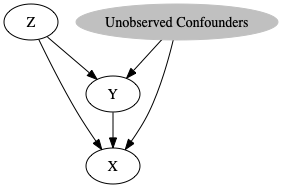

In [22]:
# With GML string
model=CausalModel(
        data = df,
        treatment='X', #データとグラフを対応づける。graghのnode labelに同じ名称がある必要あり（対応づけはそれぞれ独立）
        outcome='Y',
        graph="""graph[directed 1 node[id "Z" label "Z"]   
                    node[id "X" label "Y"]
                    node[id "Y" label "X"]      
                    edge[source "Z" target "X"]    
                    edge[source "Z" target "Y"]     
                    edge[source "X" target "Y"]]"""#idと edge内のアルファベットは一致させる必要あり。
        )
model.view_model() #グラフの.pngが出力される

display(Image(filename="causal_model.png"))#グラフの表示

In [17]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor1 (Default)
Estimand expression:
 d                    
────(Expectation(Y|Z))
d[X]                  
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,Z,U) = P(Y|X,Z)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



In [19]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression") #今回は線形回帰。Propensity score methods are applicable only for binary treatments
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

INFO:dowhy.causal_estimator:b: Y~X+Z
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

## Realized estimand
b: Y~X+Z
Target units: ate

## Estimate
Mean value: 10.000000000000004

Causal Estimate is 10.000000000000004


/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [21]:
#Adding a random common cause variable
res_random=model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause")
print(res_random)

INFO:dowhy.causal_estimator:b: Y~X+Z+w_random
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator


Refute: Add a Random Common Cause
Estimated effect:10.000000000000004
New effect:10.000000000000002



/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['X'] on outcome ['Y']


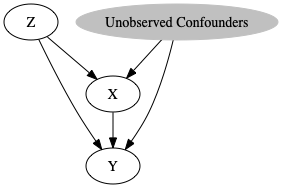

In [52]:
# With DOT string
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="digraph {Z -> X;Z -> Y;X -> Y;}"
        )
model.view_model()

from IPython.display import Image, display
display(Image(filename="causal_model.png"))